In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Flatten, Add, Dropout, Conv2D, BatchNormalization, Activation, Concatenate
from keras.layers import GlobalAveragePooling2D, Dense, MaxPooling2D, SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, multiply, add
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K


In [2]:
# data preparation
dataset_dir =  r'D:\Project\Deep Learning - Research\programs\MV-couswork\Brain Tumor Data Set\BrainTumorProcessed'
input_shape = (256, 256, 3)
batch_size = 2
num_classes = 2

train_datagen = ImageDataGenerator(
rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

test_datagen = ImageDataGenerator(
rescale = 1./255
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'test'),
    target_size = input_shape[:2],
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 666 images belonging to 2 classes.


In [3]:
from tensorflow.keras.models import load_model

model = load_model("vra.h5")

In [4]:
loss, accurancy = model.evaluate(test_generator)
print('Test loss:', loss)
print("Test accurancy", accurancy)

333/333 [==============================] - 10s 17ms/step - loss: 0.0804 - accuracy: 0.9730
Test loss: 0.08043361455202103
Test accurancy 0.9729729890823364


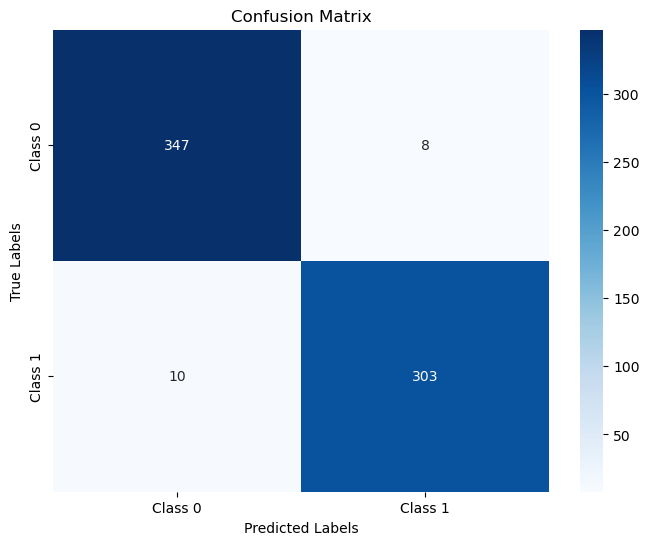

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 收集图像和真实标签
x_test, y_test = zip(*[next(test_generator) for _ in range(test_generator.samples // test_generator.batch_size + 1)])
x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)

# 进行预测并获取预测标签
y_pred = model.predict(x_test)
y_true = y_test

y_pred_tf = (y_pred > 0.5).astype(int).reshape(-1)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_true, y_pred_tf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

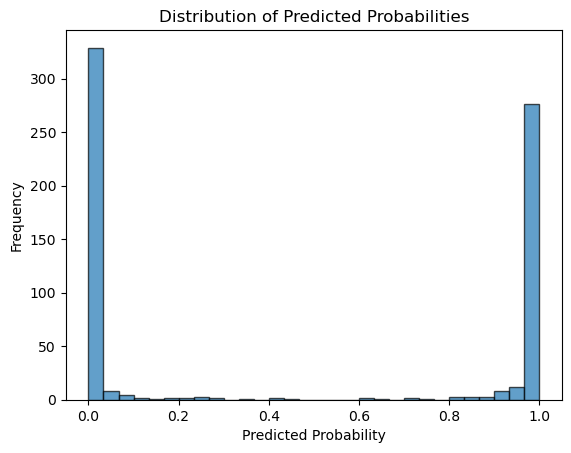

In [6]:
import matplotlib.pyplot as plt
import numpy as np


plt.hist(y_pred, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

In [7]:
testY = y_true
predY = y_pred
predY_classes = y_pred_tf

In [8]:
print(testY)
print(predY)
# print(np.sum(predY_classes==testY), testY.shape[0])

[1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.

In [9]:
class_to_label_map = {'parasitized':0 , 'uninfected':1}

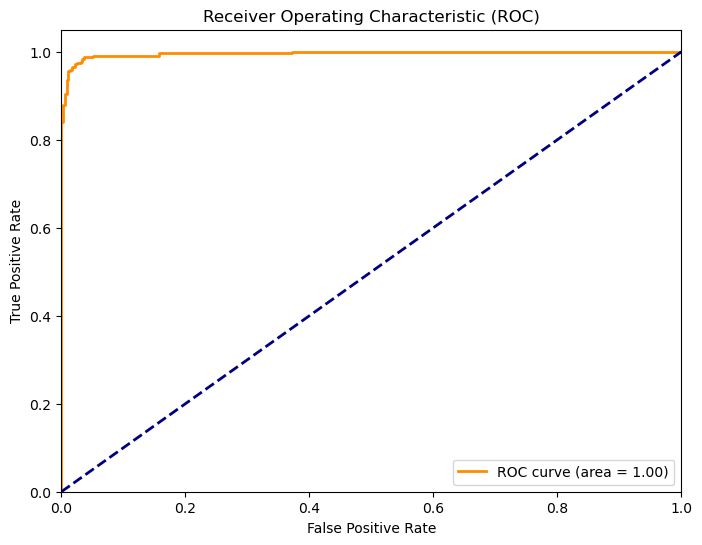

In [10]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve points and the AUC score
fpr, tpr, thresholds = roc_curve(testY, predY)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [11]:
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9960941367052154


In [12]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [13]:
cm = confusion_matrix(testY, predY_classes)

TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f'Sensitivity: {sensitivity}, Specificity: {specificity}')

Sensitivity: 0.9680511182108626, Specificity: 0.9774647887323944


In [14]:
import pandas as pd

target_names = [key for key, value in sorted(class_to_label_map.items(), key=lambda item: item[1])]

# Generate the classification report
cr = classification_report(testY, predY_classes, target_names=target_names, output_dict=True, digits=4)

# Convert the classification report to a DataFrame
cr_df = pd.DataFrame(cr).transpose()
cr_df

,precision,recall,f1-score,support
parasitized,0.971989,0.977465,0.974719,355.000000
uninfected,0.974277,0.968051,0.971154,313.000000
accuracy,0.973054,0.973054,0.973054,0.973054
macro avg,0.973133,0.972758,0.972936,668.000000
weighted avg,0.973061,0.973054,0.973049,668.000000


In [15]:
from sklearn.metrics import precision_score, f1_score

y_pred_binary = (y_pred > 0.5).astype(int).reshape(-1)

precision = precision_score(y_true, y_pred_binary)

# f1-score
f1 = f1_score(y_true, y_pred_binary)

print(f'Precision (Pc): {precision:.4f}')
print(f'F1-Score: {f1:.4f}')


Precision (Pc): 0.9743
F1-Score: 0.9712


In [16]:
from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred_binary)

print(f'Recall: {recall:.4f}')

Recall: 0.9681


In [17]:

from keras.utils.vis_utils import plot_model

plot_model(model, to_file='ensemble_model_plot.png', show_shapes=True, show_layer_names=True) 

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [18]:
import numpy as np
from sklearn.metrics import precision_score

y_pred_binary = (y_pred > 0.5).astype(int)

precision = precision_score(y_true, y_pred_binary)

print('Precision: {:.2f}'.format(precision))

Precision: 0.97


In [22]:
from tensorflow.keras.preprocessing import image


img_path = r'D:\Project\Deep Learning - Research\programs\MV-couswork\Brain Tumor Data Set\BrainTumorProcessed\Brain Tumor'
img = image.load_img(img_path)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


PermissionError: [Errno 13] Permission denied: 'D:\\Project\\Deep Learning - Research\\programs\\MV-couswork\\Brain Tumor Data Set\\BrainTumorProcessed\\Brain Tumor'